In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
url = "data.csv"
df = pd.read_csv(url, delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#  data preparations

In [2]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
from sklearn.preprocessing import StandardScaler

numeric_col = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[numeric_col] = scaler.fit_transform(df[numeric_col])

display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804841,1,19,12,...,0,0,0,0,-1.963489,0,-0.287638,0.124386,0.765761,Dropout
1,1,15,1,9254,1,1,2.076819,1,1,3,...,0,6,6,6,0.659562,0,0.876222,-1.105222,0.347199,Graduate
2,1,1,5,9070,1,1,-0.804841,1,37,37,...,0,6,0,0,-1.963489,0,-0.287638,0.124386,0.765761,Dropout
3,1,17,2,9773,1,1,-0.804841,1,38,37,...,0,6,10,5,0.416450,0,-0.813253,-1.466871,-1.375511,Graduate
4,2,39,1,8014,0,1,-2.473171,1,37,38,...,0,6,6,6,0.531608,0,0.876222,-1.105222,0.347199,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577342,1,1,1,...,0,6,8,5,0.467631,0,1.476924,1.137005,-1.789667,Graduate
4420,1,1,2,9773,1,1,-0.956508,105,1,1,...,0,6,6,2,0.147747,0,-0.175007,-0.454253,0.889126,Dropout
4421,1,1,1,9500,1,1,1.621820,1,37,37,...,0,8,9,1,0.627573,0,0.876222,-1.105222,0.347199,Dropout
4422,1,1,1,9147,1,1,3.593483,1,37,37,...,0,5,6,5,0.339678,0,-0.813253,-1.466871,-1.375511,Graduate


# Exploratory Data Analysis

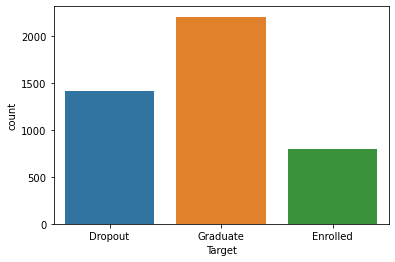

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Target Analysis 
sns.countplot(x='Target', data=df)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


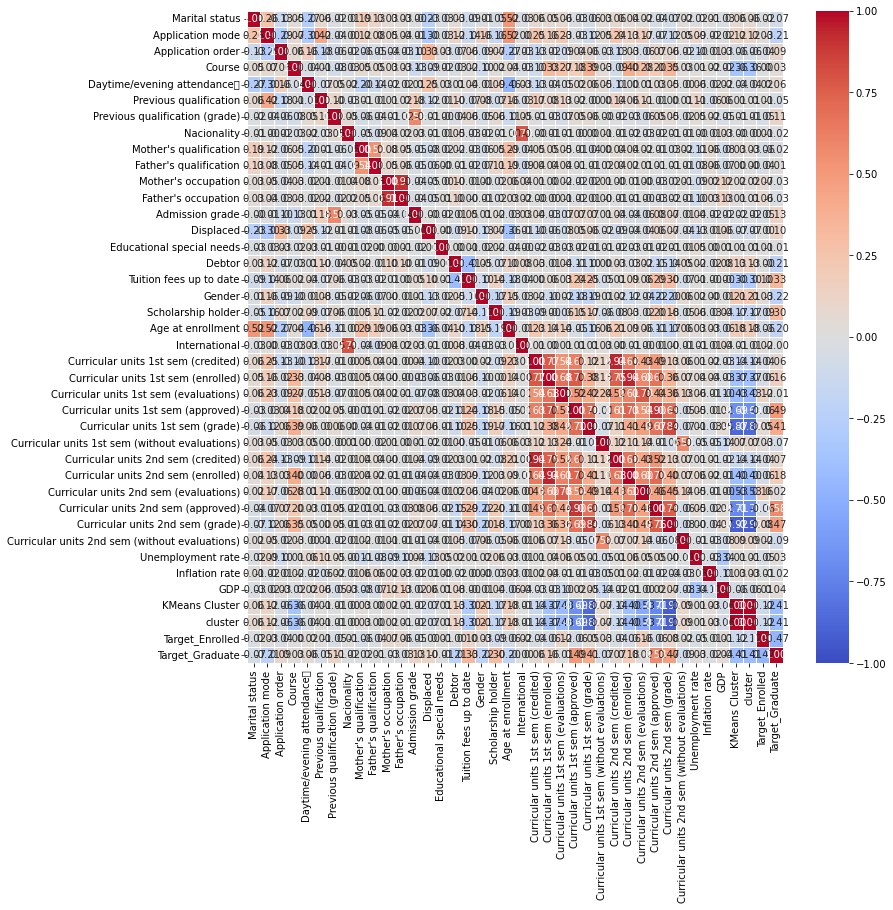

In [24]:
# Correlation Analysis - Heatmap
df_encoded = pd.get_dummies(df, columns=['Target'], drop_first=True)
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

<AxesSubplot:ylabel='Target'>

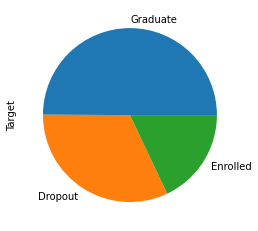

In [8]:
df['Target'].value_counts().plot.pie()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

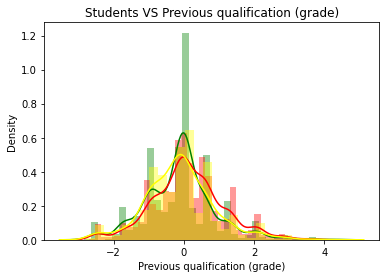

In [25]:
sns.distplot(df[df['Target'] == 'Dropout']['Previous qualification (grade)'], color='green', kde=True)
sns.distplot(df[df['Target'] == 'Graduate']['Previous qualification (grade)'], color='red', kde=True)
sns.distplot(df[df['Target'] == 'Enrolled']['Previous qualification (grade)'], color='yellow', kde=True)
plt.title("Students VS Previous qualification (grade)")
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

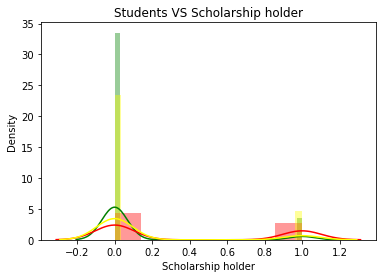

In [26]:
sns.distplot(df[df['Target'] == 'Dropout']['Scholarship holder'], color='green', kde=True)
sns.distplot(df[df['Target'] == 'Graduate']['Scholarship holder'], color='red', kde=True)
sns.distplot(df[df['Target'] == 'Enrolled']['Scholarship holder'], color='yellow', kde=True)
plt.title("Students VS Scholarship holder")
plt.show()

# Clustering

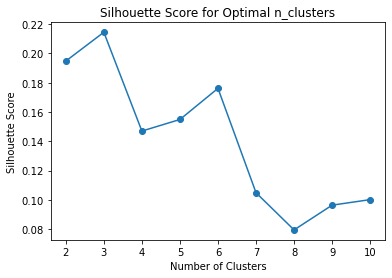

In [9]:
#k-means
X = df.drop('Target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

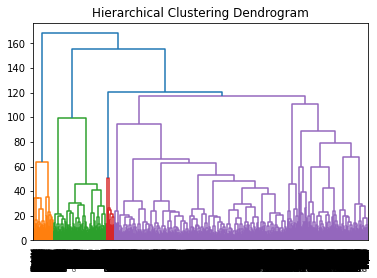

,cluster,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,KMeans Cluster,Target,Count
0,0,1.160191,17.648086,1.765203,9222.539977,0.897523,4.538007,0.004142,1.878941,19.359516,...,9.097410,5.502534,0.453611,0.117117,-0.004062,-0.017117,0.028133,0.0,Graduate,3552
1,1,1.253440,22.827982,1.575688,7366.198394,0.863532,4.739679,-0.016872,1.849771,20.386468,...,3.850917,0.090596,-1.847736,0.285550,0.016545,0.069724,-0.114598,1.0,Dropout,872


In [10]:
#Hierarchical Clustering
X = df.drop('Target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, labels=df['Target'].tolist())
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Clustering data
numeric_cols = df.drop(columns=['Target']).select_dtypes(include=['number']).columns.tolist()

categorical_cols = ['Target']

df['cluster'] = kmeans.fit_predict(X_scaled)

def mode_func(x):
    if x.name != 'Target': 
        mode_result = np.bincount(x)
        mode = np.argmax(mode_result)
        return mode
    else:
        return x.mode().iloc[0]

def count_func(x):
    return len(x)

cluster_stats_numeric = df.groupby("cluster")[numeric_cols].mean().reset_index()

cluster_stats_categorical = df.groupby("cluster")[categorical_cols].agg(mode_func).reset_index()

cluster_stats_count = df.groupby("cluster").size().reset_index(name='Count')

cluster_stats = pd.merge(cluster_stats_numeric, cluster_stats_categorical, on='cluster')
cluster_stats = pd.merge(cluster_stats, cluster_stats_count, on='cluster')

cluster_stats

# Classification

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Target', 'KMeans Cluster', 'cluster'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate model
def classifier_score(models):
    results = {"name": [],
               "score": []}
    for name, model in models.items():
        try:
            X_train_np = X_train.values
            X_test_np = X_test.values

            model.fit(X_train_np, y_train)
            y_pred = model.predict(X_test_np)

            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            classification_rep = classification_report(y_test, y_pred)

            print(f'Model: {name}')
            print(f'Accuracy: {accuracy}')
            print(f'Confusion Matrix:\n{conf_matrix}')
            print(f'Classification Report:\n{classification_rep}')
            print('------------------------')
            results["name"].append(name)
            results["score"].append(accuracy)
        except Exception as e:
            print(f"Error with {name}: {e}")

    return results
data = classifier_score(models)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6689265536723163
Confusion Matrix:
[[205  16  95]
 [ 43   7 101]
 [ 37   1 380]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.65      0.68       316
    Enrolled       0.29      0.05      0.08       151
    Graduate       0.66      0.91      0.76       418

    accuracy                           0.67       885
   macro avg       0.56      0.53      0.51       885
weighted avg       0.62      0.67      0.62       885

------------------------
Model: Decision Tree
Accuracy: 0.6768361581920904
Confusion Matrix:
[[201  69  46]
 [ 35  62  54]
 [ 40  42 336]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.73      0.64      0.68       316
    Enrolled       0.36      0.41      0.38       151
    Graduate       0.77      0.80      0.79       418

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.6

Text(0, 0.5, 'Accuracy')

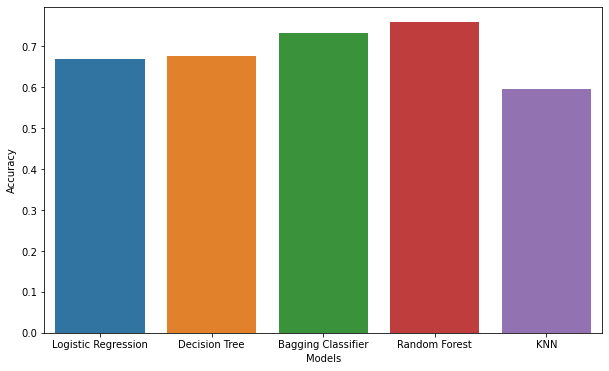

In [20]:
# bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="name", y="score", data=data, ax=ax)
plt.xlabel('Models')
plt.ylabel('Accuracy')

In [ ]:
# Kesimpulan
# -Dari kelima model yang diuji, Random Forest memiliki kinerja terbaik
# -Model yang menggunakan ensemble methods, seperti Bagging Classifier dan Random Forest, cenderung memberikan hasil yang lebih baik daripada model yang menggunakan metode tunggal seperti Logistic Regression atau Decision Tree
# -Klasifikasi pada kelas "Enrolled" cenderung sulit bagi semua model, ditunjukkan oleh recall yang rendah